
# <span style="color:rgb(213,80,0)">exercise1\_freq\_filtering\_moon.m</span>

Exercise 1 – Frequency‑domain filtering of moon.jpg


Author: ANGELOS NIKOLAOS POTAMIANOS Date: MAY 2025


In [1]:
clear; close all; clc;

## \-\-\-\-\-\-\-\-\-\- User parameters \-\-\-\-\-\-\-\-\-\-

In [2]:
image_path = fullfile('Images','Ασκηση 1','moon.jpg');  %% adjust if needed
D0 = 50;          %% Ideal low‑pass cutoff radius in pixels
save_result = true;
out_path = 'moon_lowpass.png';

## 1. Load and preprocess \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-


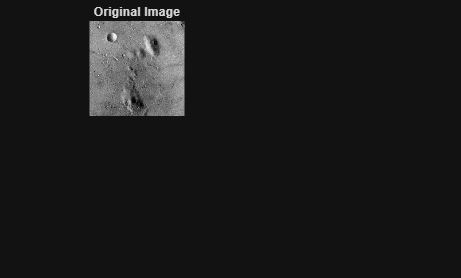

In [3]:
I = imread(image_path);
if size(I,3) == 3
    I = rgb2gray(I);
end
I = double(I);

% Display original image
figure('Name', 'Step 1: Preprocessing');
subplot(2,2,1);
imshow(uint8(I));
title('Original Image');

## Linear stretching to \[0,255\]

In [4]:
I_min = min(I(:));
I_max = max(I(:));
fprintf('Original image range: [%f, %f]\n', I_min, I_max);

Original image range: [0.000000, 255.000000]

In [5]:

I_lin = (I - I_min) / (I_max - I_min);  %% [0,1]
I_lin = I_lin * 255;                    %% [0,255]

fprintf('After stretching: [%f, %f]\n', min(I_lin(:)), max(I_lin(:)));

After stretching: [0.000000, 255.000000]


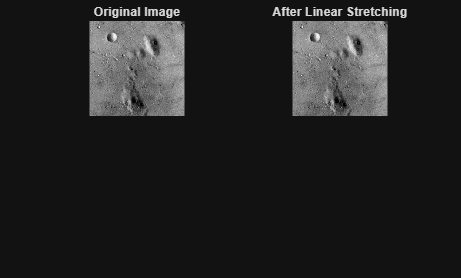

In [6]:

% Display stretched image
subplot(2,2,2);
imshow(uint8(I_lin));
title('After Linear Stretching');

## Shift zero‑frequency to the centre using (\-1)^(x+y)


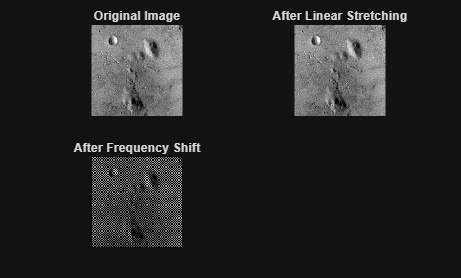

In [7]:
[M,N] = size(I_lin);
[x, y] = meshgrid(0:N-1, 0:M-1);   %% x = column, y = row indices
I_shift = I_lin .* (-1).^(x + y);

% Display shifted image (this will look noisy)
subplot(2,2,3);
imshow(uint8(real(I_shift)));
title('After Frequency Shift');

In [8]:
fprintf('Image dimensions: %d x %d pixels\n', M, N);

Image dimensions: 256 x 256 pixels

## 2. 2‑D DFT via 1‑D row‑column transforms \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

Compute 1D FFT along rows


In [9]:
tic;
fprintf('Computing 2D DFT using row-column decomposition...\n');

Computing 2D DFT using row-column decomposition...


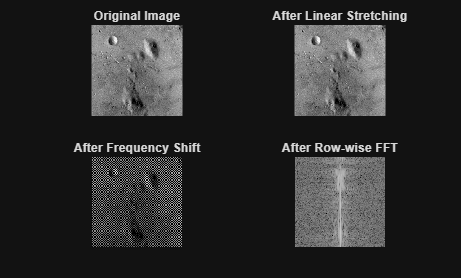

In [10]:
F_rows = fft(I_shift, [], 2);   %% 1‑D DFT along rows (dim 2)

% Display intermediate step after row FFT
subplot(2,2,4);
imshow(log(1 + abs(F_rows)), []);
title('After Row-wise FFT');

In [11]:

% Then compute 1D FFT along columns
F = fft(F_rows, [], 1);         %% then along columns (dim 1)
fprintf('2D DFT completed in %.4f seconds\n', toc);

2D DFT completed in 0.1542 seconds

## Visualise magnitude (linear & log)


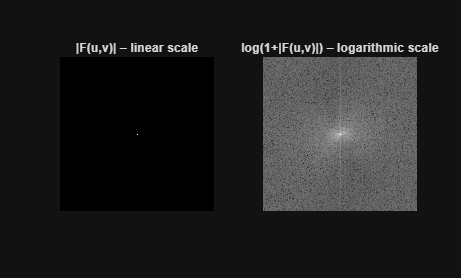

In [12]:
figure('Name', 'Step 2: Frequency Domain');
subplot(1,2,1);
imagesc(abs(F)); axis image off; colormap gray;
title('|F(u,v)| – linear scale');

subplot(1,2,2);
imagesc(log(1 + abs(F))); axis image off; colormap gray;
title('log(1+|F(u,v)|) – logarithmic scale');

## 3. Ideal low‑pass filtering \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [13]:
fprintf('\nStep 3: Applying ideal low-pass filter with cutoff D0 = %d pixels\n', D0);

Step 3: Applying ideal low-pass filter with cutoff D0 = 50 pixels


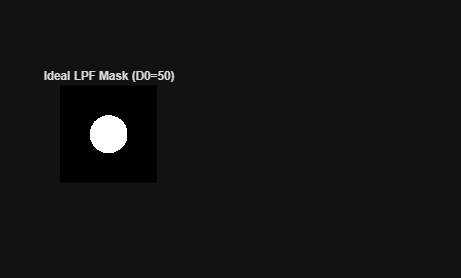

In [14]:

% Create centered frequency coordinate grid
[U, V] = meshgrid(-N/2:N/2-1, -M/2:M/2-1);  %% centred frequency grid
D = sqrt(U.^2 + V.^2);
H = double(D <= D0);        %% ideal LPF transfer function

% Display the filter mask
figure('Name', 'Step 3: Low-Pass Filtering');
subplot(1,3,1);
imagesc(H); axis image off; colormap gray;
title(sprintf('Ideal LPF Mask (D0=%d)', D0));

## Apply filter in frequency domain

In [15]:
F_filt = F .* H;
fprintf('Filter applied in frequency domain\n');

Filter applied in frequency domain

In [16]:

% Display filtered spectrum
subplot(1,3,2);
imagesc(log(1 + abs(F_filt))); axis image off;
title('Filtered Spectrum');

% Display ratio of kept vs total frequency components
freq_ratio = sum(H(:))/numel(H);
fprintf('Kept %.2f%% of frequency components\n', freq_ratio*100);

Kept 11.97% of frequency components


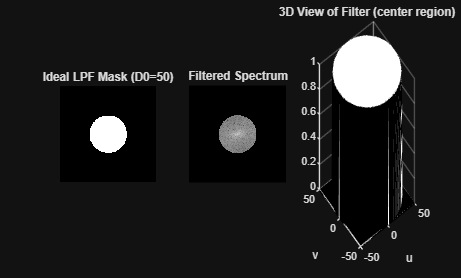

In [17]:

subplot(1,3,3);
mesh(U(M/2-49:M/2+50, N/2-49:N/2+50), V(M/2-49:M/2+50, N/2-49:N/2+50), H(M/2-49:M/2+50, N/2-49:N/2+50));
title('3D View of Filter (center region)');
xlabel('u'); ylabel('v');

## 4. Inverse 2‑D IDFT via 1‑D transforms \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [18]:
fprintf('\nStep 4: Computing inverse 2D DFT...\n');

Step 4: Computing inverse 2D DFT...


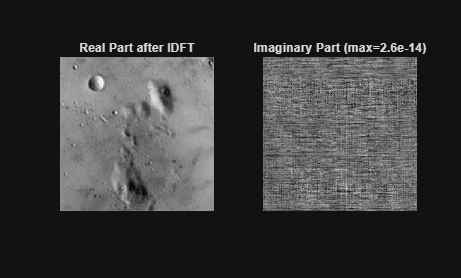

In [19]:
tic;
f_shift = ifft(F_filt, [], 1);  %% columns first
f_shift = ifft(f_shift, [], 2); %% then rows

% Undo the frequency shift for visualization purposes only
f_visualize = f_shift .* (-1).^(x + y);

% Display the real and imaginary parts
figure('Name', 'Step 4: Inverse Transform');
subplot(1,2,1);
imshow(real(f_visualize), []);  % Use properly unshifted version
title('Real Part after IDFT');

subplot(1,2,2);
imshow(imag(f_visualize), []);  % Use properly unshifted version
title(sprintf('Imaginary Part (max=%.1e)', max(abs(imag(f_shift(:))))));

In [20]:

% Continue with the original processing
f_shift = real(f_shift);        %% discard negligible imaginary part
fprintf('IDFT completed in %.4f seconds\n', toc);

IDFT completed in 0.1476 seconds

In [21]:
fprintf('Max imaginary component: %.2e (negligible)\n', max(abs(imag(f_shift(:)))));

Max imaginary component: 0.00e+00 (negligible)

## 5. Reverse shift and normalise back to \[0,255\] \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [22]:
fprintf('\nStep 5: Post-processing...\n');

Step 5: Post-processing...

In [23]:
f = f_shift .* (-1).^(x + y);   %% undo earlier spatial shift

## Scale to uint8 for display

In [24]:
f_min = min(f(:));
f_max = max(f(:));
fprintf('Output image range before normalization: [%f, %f]\n', f_min, f_max);

Output image range before normalization: [-8.326598, 255.929820]


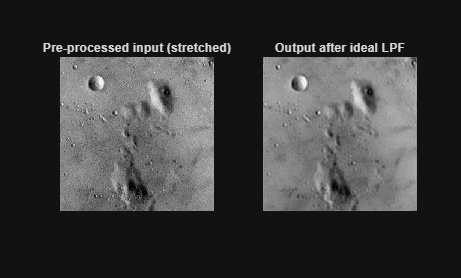

In [25]:

f = f - f_min;
f = f / max(f(:));
f_uint8 = uint8(round(f * 255));

figure('Name', 'Step 5: Final Result');
subplot(1,2,1);
imshow(uint8(I_lin));
title('Pre‑processed input (stretched)');

subplot(1,2,2);
imshow(f_uint8);
title('Output after ideal LPF');

In [26]:

% Calculate MSE between input and output
mse = mean((I_lin(:) - double(f_uint8(:))).^2);
fprintf('Mean Squared Error between input and output: %.2f\n', mse);

Mean Squared Error between input and output: 118.54

In [27]:

if save_result
    imwrite(f_uint8, out_path);
    fprintf('Filtered image saved to %s\n', out_path);
end

Filtered image saved to moon_lowpass.png


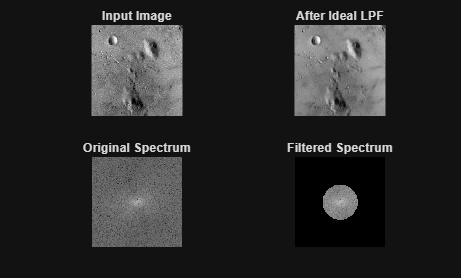

In [28]:

% Final figure for side-by-side comparison
figure('Name', 'Before and After Comparison');
subplot(2,2,1); imshow(uint8(I_lin)); title('Input Image');
subplot(2,2,2); imshow(f_uint8); title('After Ideal LPF');
subplot(2,2,3); imshow(log(1 + abs(F)), []); title('Original Spectrum');
subplot(2,2,4); imshow(log(1 + abs(F_filt)), []); title('Filtered Spectrum');

In [29]:

fprintf('\nFrequency-domain filtering complete!\n');

Frequency-domain filtering complete!